In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

In [40]:
datasets = pd.read_csv('data.csv') 
print(datasets)

           id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]


In [41]:
datasets.isnull().sum()
datasets.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [42]:
#Use One Hot Encoder from scikit learn
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
x = onehotencoder.fit_transform(datasets.diagnosis.values.reshape(-1,1)).toarray()
x

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [43]:
dfOneHot = pd.DataFrame(x, columns = ["diagnosis"+str(int(i)) for i in range(datasets.shape[1]-31)]) 
df = pd.concat([datasets, dfOneHot], axis=1) #column
#droping the country column 
df= df.drop(['diagnosis'], axis=1) 
#printing to verify 
print(df)
datasets = df

           id  radius_mean  texture_mean  ...  Unnamed: 32  diagnosis0  diagnosis1
0      842302        17.99         10.38  ...          NaN         0.0         1.0
1      842517        20.57         17.77  ...          NaN         0.0         1.0
2    84300903        19.69         21.25  ...          NaN         0.0         1.0
3    84348301        11.42         20.38  ...          NaN         0.0         1.0
4    84358402        20.29         14.34  ...          NaN         0.0         1.0
..        ...          ...           ...  ...          ...         ...         ...
564    926424        21.56         22.39  ...          NaN         0.0         1.0
565    926682        20.13         28.25  ...          NaN         0.0         1.0
566    926954        16.60         28.08  ...          NaN         0.0         1.0
567    927241        20.60         29.33  ...          NaN         0.0         1.0
568     92751         7.76         24.54  ...          NaN         1.0         0.0

[56

In [44]:
newdata = datasets.iloc[:,0:31]
newtarget = datasets.iloc[:,32:34]
print(newdata)
print(newtarget)

           id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0      842302        17.99  ...          0.4601                  0.11890
1      842517        20.57  ...          0.2750                  0.08902
2    84300903        19.69  ...          0.3613                  0.08758
3    84348301        11.42  ...          0.6638                  0.17300
4    84358402        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564    926424        21.56  ...          0.2060                  0.07115
565    926682        20.13  ...          0.2572                  0.06637
566    926954        16.60  ...          0.2218                  0.07820
567    927241        20.60  ...          0.4087                  0.12400
568     92751         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]
     diagnosis0  diagnosis1
0           0.0         1.0
1           0.0         1.0
2           0.0

In [45]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(newdata,
newtarget, test_size = 0.50, random_state = 125)

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=109,random_state=125)

# Train Decision Tree Classifer
clf = clf.fit(data_train,target_train)

#Predict the response for test dataset
y_pred = clf.predict(data_test)
print(y_pred)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 

In [47]:
print("Accuracy:",metrics.accuracy_score(target_test, y_pred))
print("Recall:",metrics.recall_score(target_test, y_pred,average="weighted"))
print("Precision:",metrics.precision_score(target_test, y_pred,average="weighted"))

Accuracy: 0.9333333333333333
Recall: 0.9333333333333333
Precision: 0.9331171171171172


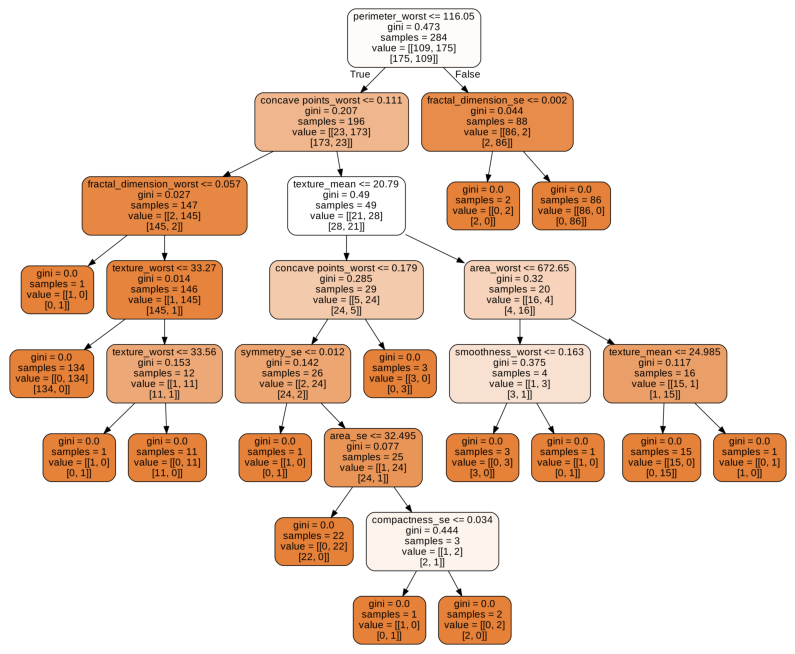

In [48]:
from sklearn.tree import export_graphviz

feature_names=["id", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
export_graphviz(clf,out_file='cancer.dot',feature_names=feature_names,class_names=['M','B'], filled=True,rounded=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'cancer.dot', '-o', 'cancer.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('cancer.png'))
plt.axis('off')
plt.show()